# The copy of a use of MCMC method
to sample the beta function
[the web](http://blog.csdn.net/lanchunhui/article/details/50452515)

暂时还没怎么看懂

# 基本思路见笔记本 2月5日笔记
## 此处重复一遍算法
1. 初始化Markov Chain
2. 对 t = 0,1,2,...(to range 10**5) 循环以下采样：
> * t时刻，$ X_t = x_t $,采样 $ y \sim q(x|x_t) $。采样的结果 $y$就是我们本次采样的其中一个结果。
> * 从均匀分布采样 $ u \sim Uniform[0,1] $; 若 $ u < \alpha(x_t, y) = min{...} $ ，则接受；否则不接受转移。（这一部分就是对接受率$\alpha$的选择)

In [1]:
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt
import time

In [2]:
# def the beta distribution
def beta_s(x, a, b):
    return x**(a-1)*(1-x)**(b-1)
def beta(x, a, b):
    return beta_s(x, a, b)/ss.beta(a, b)

In [99]:
def plot_mcmc(a,b):
    cur = np.random.rand() #set the initial statement of the markov chain
    states = [cur]
    for i in range(10**4):
        u = np.random.rand() #go through the step 2
        nex = u
        if u < np.min((beta_s(nex, a, b)/beta_s(cur, a, b), 1)): # if accept the new chain, set the cur as nex
            states.append(nex)
            cur = nex
    x = np.arange(0, 1, 0.01) # show the plot
    plt.figure(figsize = (10, 5))
    plt.plot(x,beta(x,a,b), lw=2, label='real dist: a=%d, b=%d'%(a,b))
    plt.hist(states[-1000:], 25, normed=True, label='simu mcmc: a=%d, b=%d'%(a,b))
    plt.legend(loc='upper right')
    plt.show()
    return states

In [102]:
def drawhist(s):
    yy,xx,cc = plt.hist(s)
    new_xx = []
    for i in range(len(xx)-1):
        new_xx.append(0.5*( xx[i] + xx[i+1] ))
    plt.figure()
    plt.plot(new_xx, yy )
    plt.show()

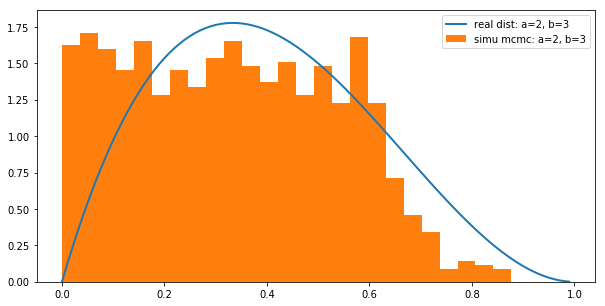

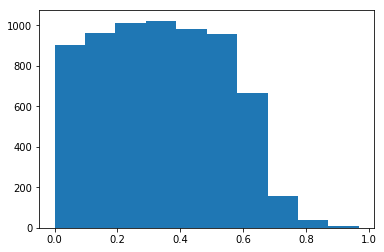

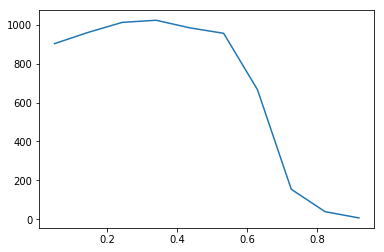

0.39688706398010254


In [103]:
start_time = time.time()
s = plot_mcmc(2,3)
drawhist(s)
plt.show()
delta_time = time.time() - start_time
print(delta_time)

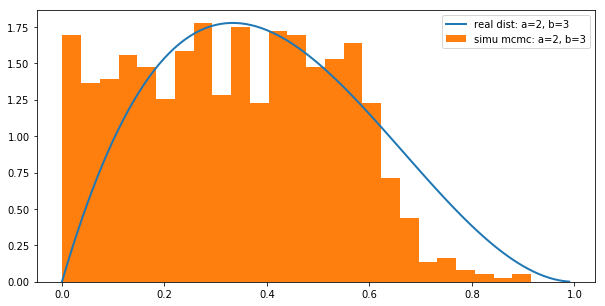

0.2136518955230713


In [27]:
start_time = time.time()
plot_mcmc(2,3)
delta_time = time.time() - start_time
print(delta_time)